<a href="https://colab.research.google.com/github/Sachira-Heshan/food-demand-forecast/blob/main/lab-03/2019E055_L3_EC9560.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining - EC9560 - Mini Project

## LAB 03

## 10 Nov 2023

## Food Demand Forecasting

## 2019/E/055 - KARUNARATHNA K.M.S.H.

### This is the continuation of the Lab 01 and Lab 02, These things are from the Lab 01, Lab 02 and I will mention the starting of Lab 03 work using this markdown

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Data Mining/food-demand-forecasting/train_GzS76OK/train.csv')

In [3]:
df_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [4]:
df_train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [5]:
df_train.sample(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
15679,1237677,6,157,1754,227.95,229.95,0,0,323
299485,1421343,97,61,1543,472.39,473.39,0,0,42
158254,1376027,54,24,1962,680.03,680.03,0,0,162
229827,1301286,76,161,2490,146.50,244.50,1,1,419
452390,1200568,144,41,2304,485.03,486.03,0,0,40
118235,1191095,41,89,1558,680.03,726.53,0,1,163
302396,1068934,98,39,1727,403.55,404.55,0,0,203
305937,1434163,99,51,2760,223.10,241.53,0,1,325
252094,1229353,83,106,2304,389.03,562.63,1,1,40
349479,1305376,113,75,1878,281.33,280.33,0,0,310


In [6]:
df_train['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [7]:
df_train['homepage_featured'].value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

In [8]:
# seperate the features and the target values
X = df_train.drop(columns=['num_orders'])
y = df_train['num_orders']

In [9]:
X

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1379560,1,55,1885,136.83,152.29,0,0
1,1466964,1,55,1993,136.83,135.83,0,0
2,1346989,1,55,2539,134.86,135.86,0,0
3,1338232,1,55,2139,339.50,437.53,0,0
4,1448490,1,55,2631,243.50,242.50,0,0
...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0


In [10]:
df_train.isnull().sum().sum()

0

In [11]:
df_meal_info = pd.read_csv('/content/drive/MyDrive/Data Mining/food-demand-forecasting/train_GzS76OK/meal_info.csv')

In [12]:
df_meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [13]:
df_meal_info['category'].value_counts()

Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: category, dtype: int64

In [14]:
df_meal_info['cuisine'].value_counts()

Thai           15
Indian         12
Italian        12
Continental    12
Name: cuisine, dtype: int64

In [15]:
df_fulfillment_center = pd.read_csv('/content/drive/MyDrive/Data Mining/food-demand-forecasting/train_GzS76OK/fulfilment_center_info.csv')

In [16]:
df_fulfillment_center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [17]:
weekly_sales = df_train.groupby("week")["num_orders"].sum().reset_index()

In [18]:
weekly_sales

,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197


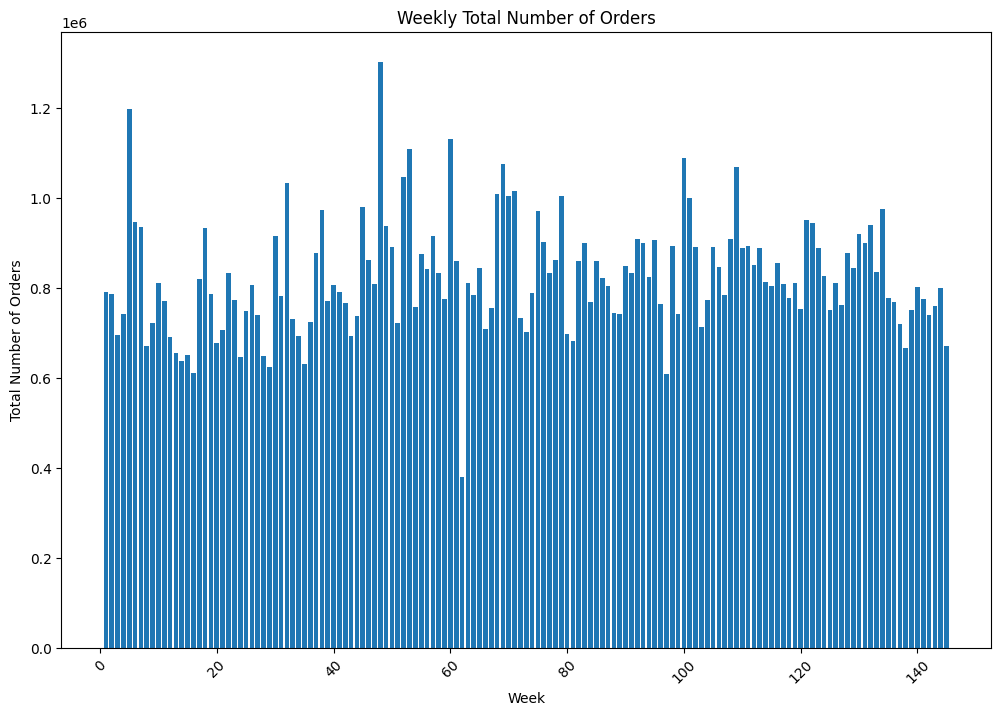

In [19]:
import matplotlib.pyplot as plt

# plot the graph of total sales by week
plt.figure(figsize=(12, 8))
plt.bar(weekly_sales["week"], weekly_sales["num_orders"])
plt.xlabel("Week")
plt.ylabel("Total Number of Orders")
plt.title("Weekly Total Number of Orders")
plt.xticks(rotation=45)
plt.show()

In [20]:
# sales by meal

In [21]:
sales_by_meals = df_train.groupby("meal_id")["num_orders"].sum().reset_index()

In [22]:
sales_by_meals

,meal_id,num_orders
0,1062,4712795
1,1109,6367773
2,1198,1018280
3,1207,1800856
4,1216,533564
5,1230,1843969
6,1247,231897
7,1248,874750
8,1311,1489681
9,1438,395084


In [23]:
sales_by_meals["meal_id"] = sales_by_meals["meal_id"].astype(str)

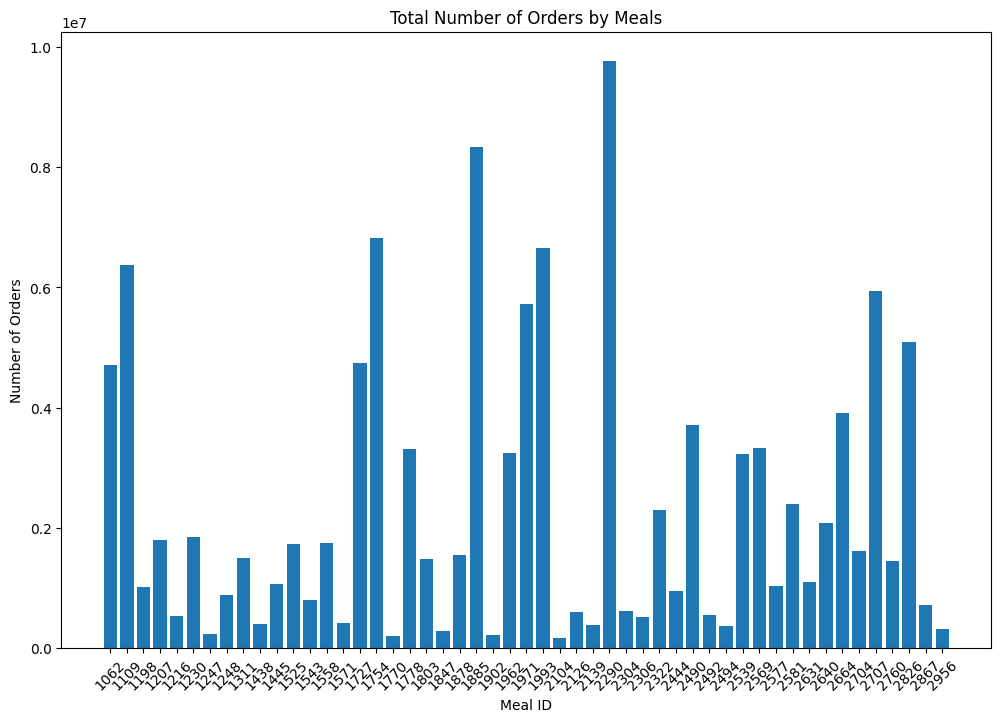

In [24]:
import matplotlib.pyplot as plt

# plot the graph of total number of orders by meal
plt.figure(figsize=(12, 8))
plt.bar(sales_by_meals["meal_id"], sales_by_meals["num_orders"])
plt.xlabel("Meal ID")
plt.ylabel("Number of Orders")
plt.title("Total Number of Orders by Meals")
plt.xticks(rotation=45)
plt.show()

In [25]:
df_train_grouped_by_week = df_train.groupby('week')

In [26]:
df_train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

### Above this point is the Lab 01 work

# Lab 02

## 06 OCT 2023

In [27]:
email_promotion_df = df_train[df_train["emailer_for_promotion"] == 1]

In [28]:
email_promotion_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
14,1378227,1,55,1109,264.84,297.79,1,0,756
20,1044821,1,55,1971,259.99,320.13,1,1,798
24,1338119,1,55,1558,583.03,610.13,1,0,162
25,1188372,1,55,2581,583.03,612.13,1,0,312
26,1440008,1,55,1962,582.03,612.13,1,0,231
...,...,...,...,...,...,...,...,...,...
456434,1411039,145,68,2306,242.53,335.62,1,0,15
456478,1151893,145,51,2306,244.50,337.62,1,0,80
456513,1261448,145,61,1778,150.41,157.14,1,0,271
456514,1071621,145,61,1062,159.08,153.26,1,0,378


In [29]:
homepage_featured_df = df_train[df_train["homepage_featured"] == 1]

In [30]:
homepage_featured_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
9,1054194,1,55,1207,325.92,384.18,0,1,676
10,1469367,1,55,1230,323.01,390.00,0,1,823
11,1029333,1,55,2322,322.07,388.00,0,1,972
20,1044821,1,55,1971,259.99,320.13,1,1,798
34,1012104,1,24,1993,134.83,135.83,0,1,1243
...,...,...,...,...,...,...,...,...,...
456500,1213771,145,51,2704,319.13,321.13,0,1,162
456504,1161535,145,51,2664,240.56,322.07,0,1,634
456505,1215794,145,51,2569,241.53,339.56,0,1,473
456511,1248146,145,61,2631,152.35,150.35,0,1,136


In [31]:
weekly_sales_email_promotion_only = email_promotion_df.groupby("week")["num_orders"].sum().reset_index()

In [32]:
weekly_sales_email_promotion_only

,week,num_orders
0,1,162518
1,2,247037
2,3,40862
3,5,570427
4,6,39430
...,...,...
133,141,142724
134,142,112694
135,143,9460
136,144,125406


In [33]:
weekly_sales_homepage_featured_only = homepage_featured_df.groupby("week")["num_orders"].sum().reset_index()

In [34]:
weekly_sales_homepage_featured_only

,week,num_orders
0,1,176567
1,2,244139
2,3,148255
3,4,145571
4,5,654956
...,...,...
140,141,152020
141,142,124840
142,143,70493
143,144,113103


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

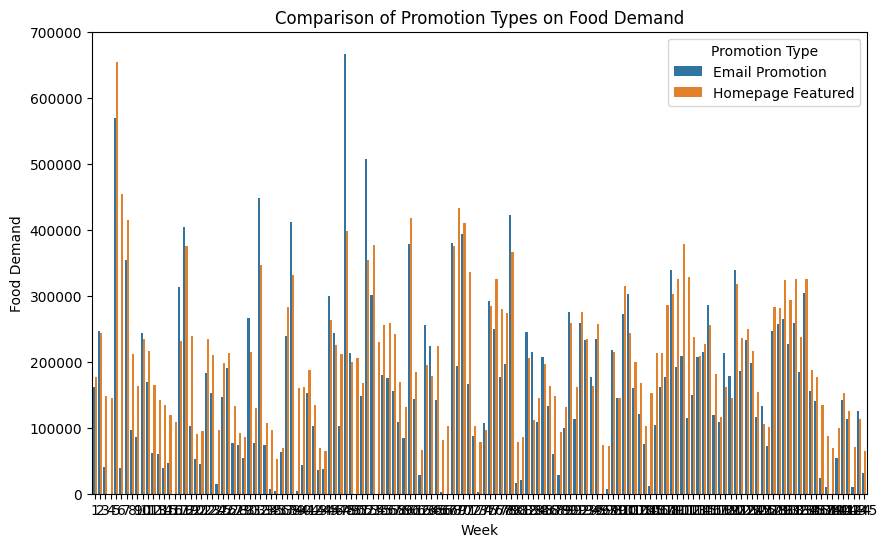

In [36]:
# Combine the two dataframes into one for plotting
combined_data = pd.concat([weekly_sales_email_promotion_only.assign(Promotion_Type='Email Promotion'),
                            weekly_sales_homepage_featured_only.assign(Promotion_Type='Homepage Featured')])

# Create a grouped bar plot to compare email promotion and homepage featured
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_data, x="week", y="num_orders", hue="Promotion_Type")
plt.xlabel("Week")
plt.ylabel("Food Demand")
plt.title("Comparison of Promotion Types on Food Demand")
plt.legend(title="Promotion Type")
plt.show()

In [37]:
# as we can see in the most of the weeks homepage featured meals got higher demand than from the email promotion

In [38]:
# above I divided data as X and y features and target

In [39]:
X

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1379560,1,55,1885,136.83,152.29,0,0
1,1466964,1,55,1993,136.83,135.83,0,0
2,1346989,1,55,2539,134.86,135.86,0,0
3,1338232,1,55,2139,339.50,437.53,0,0
4,1448490,1,55,2631,243.50,242.50,0,0
...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0
456544,1062036,145,61,2304,482.09,482.09,0,0
456545,1110849,145,61,2664,237.68,321.07,0,0
456546,1147725,145,61,2569,243.50,313.34,0,0


In [40]:
y

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [41]:
X.drop(columns=["id"], inplace=True)

In [42]:
X

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1,55,1885,136.83,152.29,0,0
1,1,55,1993,136.83,135.83,0,0
2,1,55,2539,134.86,135.86,0,0
3,1,55,2139,339.50,437.53,0,0
4,1,55,2631,243.50,242.50,0,0
...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0
456544,145,61,2304,482.09,482.09,0,0
456545,145,61,2664,237.68,321.07,0,0
456546,145,61,2569,243.50,313.34,0,0


In [43]:
# let's calculate the discount

In [44]:
X["discount"] = X["base_price"] - X["checkout_price"]

In [45]:
X

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,discount
0,1,55,1885,136.83,152.29,0,0,15.46
1,1,55,1993,136.83,135.83,0,0,-1.00
2,1,55,2539,134.86,135.86,0,0,1.00
3,1,55,2139,339.50,437.53,0,0,98.03
4,1,55,2631,243.50,242.50,0,0,-1.00
...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,0.00
456544,145,61,2304,482.09,482.09,0,0,0.00
456545,145,61,2664,237.68,321.07,0,0,83.39
456546,145,61,2569,243.50,313.34,0,0,69.84


In [46]:
# now let's remove the checkout price and base price, because we calculated the dicount and add as a new column

In [47]:
X_drop = X.drop(columns=["base_price", "checkout_price"])

In [48]:
X_drop

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,discount
0,1,55,1885,0,0,15.46
1,1,55,1993,0,0,-1.00
2,1,55,2539,0,0,1.00
3,1,55,2139,0,0,98.03
4,1,55,2631,0,0,-1.00
...,...,...,...,...,...,...
456543,145,61,1543,0,0,0.00
456544,145,61,2304,0,0,0.00
456545,145,61,2664,0,0,83.39
456546,145,61,2569,0,0,69.84


In [49]:
week_01_data = X[X["week"] == 1]

In [50]:
week_01_data

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,discount
0,1,55,1885,136.83,152.29,0,0,15.46
1,1,55,1993,136.83,135.83,0,0,-1.00
2,1,55,2539,134.86,135.86,0,0,1.00
3,1,55,2139,339.50,437.53,0,0,98.03
4,1,55,2631,243.50,242.50,0,0,-1.00
...,...,...,...,...,...,...,...,...
2917,1,61,1525,242.50,242.50,0,0,0.00
2918,1,61,2704,242.50,275.51,0,0,33.01
2919,1,61,2492,445.23,445.23,0,0,0.00
2920,1,61,1543,503.43,503.43,0,0,0.00


In [51]:
week_01_data.drop(columns=["week"], inplace=True)

<ipython-input-51-5158aae8ba90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_01_data.drop(columns=["week"], inplace=True)


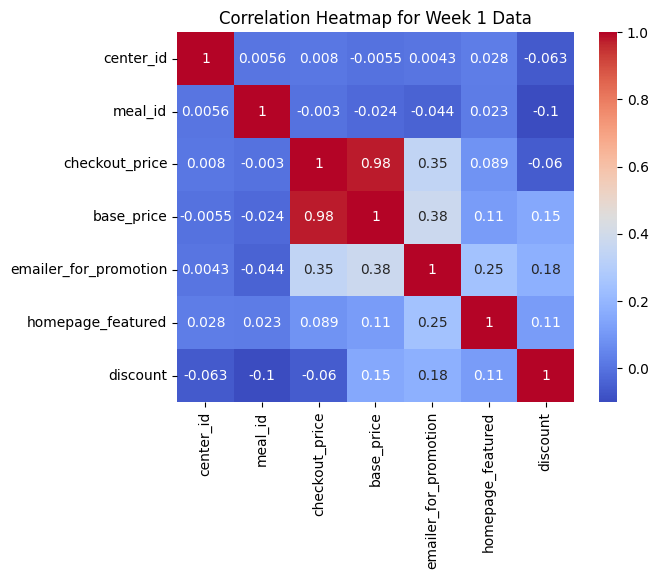

In [52]:
correlation_matrix = week_01_data.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Week 1 Data')
plt.show()

In [53]:
week_01_data = df_train[df_train["week"] == 1]

In [54]:
week_01_data.drop(columns=["id"], inplace=True)

<ipython-input-54-5c04cfac4e74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_01_data.drop(columns=["id"], inplace=True)


In [55]:
week_01_data

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1,55,1885,136.83,152.29,0,0,177
1,1,55,1993,136.83,135.83,0,0,270
2,1,55,2539,134.86,135.86,0,0,189
3,1,55,2139,339.50,437.53,0,0,54
4,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...
2917,1,61,1525,242.50,242.50,0,0,42
2918,1,61,2704,242.50,275.51,0,0,107
2919,1,61,2492,445.23,445.23,0,0,28
2920,1,61,1543,503.43,503.43,0,0,69


In [56]:
# draw a bar chart for week 1 data

In [57]:
# plt.bar(week_01_data['center_id'], week_01_data['num_orders'])
# plt.xlabel('Category')
# plt.ylabel('Orders')
# plt.title('Week 1 Data')
# plt.xticks(rotation=45)  # Rotate x-axis labels if needed
# plt.show()

In [58]:
# let's split the data into train and test

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape

(365238, 8)

In [61]:
# now let's apply Support Vector Regression algorithm

In [62]:
from sklearn.svm import SVR

In [63]:
# # Initialize the SVR model
# svr = SVR(kernel='linear', C=1.0, epsilon=0.2)

# # Fit the SVR model to the data
# svr.fit(X_train, y_train)

# # Predict using the trained model
# y_pred = svr.predict(X_test)

In [64]:
# import numpy as np

# # Calculate the RMSLE
# def rmsle(y_test, y_pred):
#     log_diff = np.log1p(y_test) - np.log1p(y_pred)
#     squared_log_diff = np.square(log_diff)
#     mean_squared_log_diff = np.mean(squared_log_diff)
#     rmsle = np.sqrt(mean_squared_log_diff)
#     return rmsle

# # Calculate RMSLE for your predictions
# rmsle_score = rmsle(y_test, y_pred)

# print("RMSLE:", rmsle_score)

# Above this point Lab 02 works

# **Lab 03** - EC9560 - 10 Nov 2023
### KARUNARATHNA K.M.S.H.
### 2019/E/055

In [66]:
sales_by_meals

,meal_id,num_orders
0,1062,4712795
1,1109,6367773
2,1198,1018280
3,1207,1800856
4,1216,533564
5,1230,1843969
6,1247,231897
7,1248,874750
8,1311,1489681
9,1438,395084


In [67]:
sorted_sales = sales_by_meals.sort_values(by='num_orders', ascending=False)
sorted_sales

,meal_id,num_orders
30,2290,9770303
22,1885,8346246
16,1754,6818059
26,1993,6656856
1,1109,6367773
46,2707,5932792
25,1971,5728620
48,2826,5090103
15,1727,4735987
0,1062,4712795


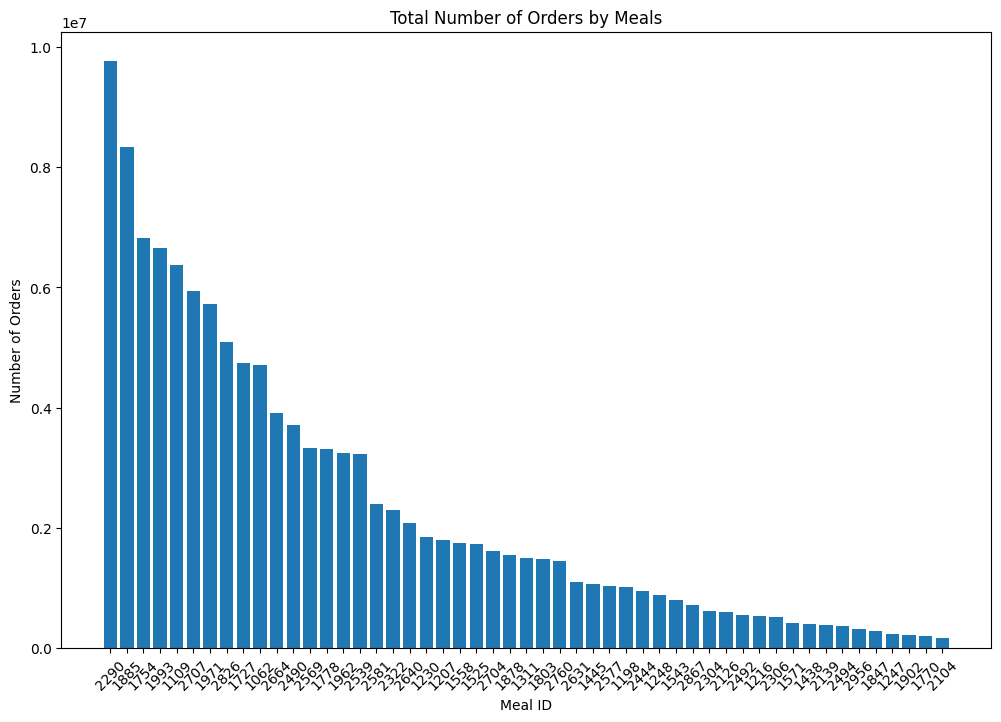

In [68]:
import matplotlib.pyplot as plt

# plot the graph of total number of orders by meal
plt.figure(figsize=(12, 8))
plt.bar(sorted_sales["meal_id"], sorted_sales["num_orders"])
plt.xlabel("Meal ID")
plt.ylabel("Number of Orders")
plt.title("Total Number of Orders by Meals")
plt.xticks(rotation=45)
plt.show()

In [78]:
# here I can say that the meal_id 2290 have the highest number of orders, let's see what that meal is

In [70]:
df_meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [71]:
df_fulfillment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [77]:
max_meal_info = df_meal_info[df_meal_info['meal_id'] == 2290]
max_meal_info

,meal_id,category,cuisine
17,2290,Rice Bowl,Indian


In [79]:
# let's see the sales by center

In [80]:
sales_by_center = df_train.groupby("center_id")["num_orders"].sum().reset_index()
sales_by_center

,center_id,num_orders
0,10,3381018
1,11,2797300
2,13,4296545
3,14,1195108
4,17,1218319
...,...,...
72,161,813948
73,162,680255
74,174,2792587
75,177,1021177


In [81]:
# now let's sort this data and plot

In [90]:
sorted_sales_by_center = sales_by_center.sort_values(by='num_orders', ascending=False)
sorted_sales_by_center

,center_id,num_orders
2,13,4296545
18,43,3920294
0,10,3381018
21,52,3125835
63,137,3117478
...,...,...
35,74,691044
73,162,680255
68,149,637527
16,41,497338


In [97]:
import numpy as np

sorted_centers = sorted_sales_by_center["center_id"].values.astype(str)
sorted_orders = sorted_sales_by_center["num_orders"].values

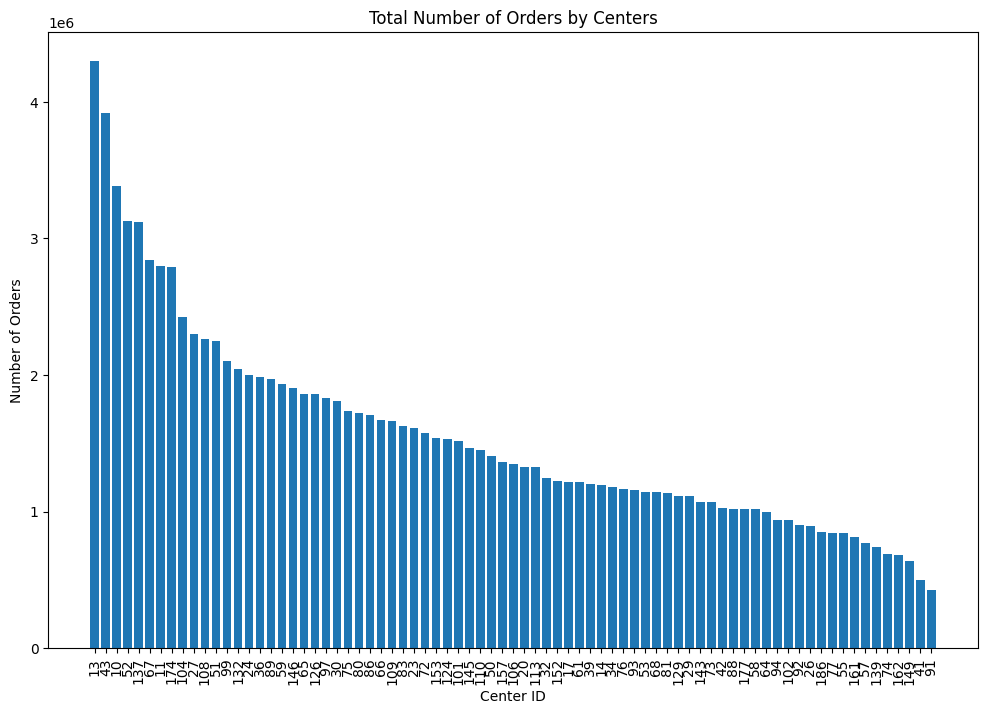

In [100]:
import matplotlib.pyplot as plt

# Plot the graph of total number of orders by center
plt.figure(figsize=(12, 8))
plt.bar(sorted_centers, sorted_orders)
plt.xlabel("Center ID")
plt.ylabel("Number of Orders")
plt.title("Total Number of Orders by Centers")
plt.xticks(sorted_centers, rotation=90)
plt.show()

In [101]:
# according to the above plot we can see that the most orders come from the center where center_id is 13
# let's see what is that center is

In [102]:
max_center_info = df_fulfillment_center[df_fulfillment_center['center_id'] == 13]
max_center_info

,center_id,city_code,region_code,center_type,op_area
1,13,590,56,TYPE_B,6.7


In [105]:
X.sample(10)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,discount
56222,20,104,2664,321.13,319.13,0,0,-2.00
281508,92,17,1727,349.26,446.23,0,0,96.97
14501,6,11,2631,248.38,246.38,0,0,-2.00
96354,33,23,1847,257.08,256.08,0,0,-1.00
270833,89,74,2956,582.03,583.03,0,0,1.00
176364,59,58,1248,149.41,148.41,0,0,-1.00
394993,127,99,2956,631.53,629.53,0,0,-2.00
387041,124,58,2304,468.51,470.51,0,0,2.00
434021,139,146,2640,320.13,321.13,0,0,1.00
259047,85,104,2490,194.03,333.74,0,0,139.71


In [107]:
y

0         177
1         270
2         189
3          54
4          40
         ... 
456543     68
456544     42
456545    501
456546    729
456547    162
Name: num_orders, Length: 456548, dtype: int64

In [108]:
# in previous lab I added a new column called discount let's see the how much information about the target are stored in each feature
# using mutual information

In [109]:
# mutual information values
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calculate Mutual Information between each feature and the target variable
mi_scores = mutual_info_classif(X, y, discrete_features=[False]*X.shape[1])

# Create a dictionary that maps feature names to their MI scores
feature_mi_scores = {feature_name: mi_score for feature_name, mi_score in zip(X.columns, mi_scores)}

# Sort the features in ascending order of their MI scores
sorted_features_ascending = sorted(feature_mi_scores.items(), key=lambda x: x[1])

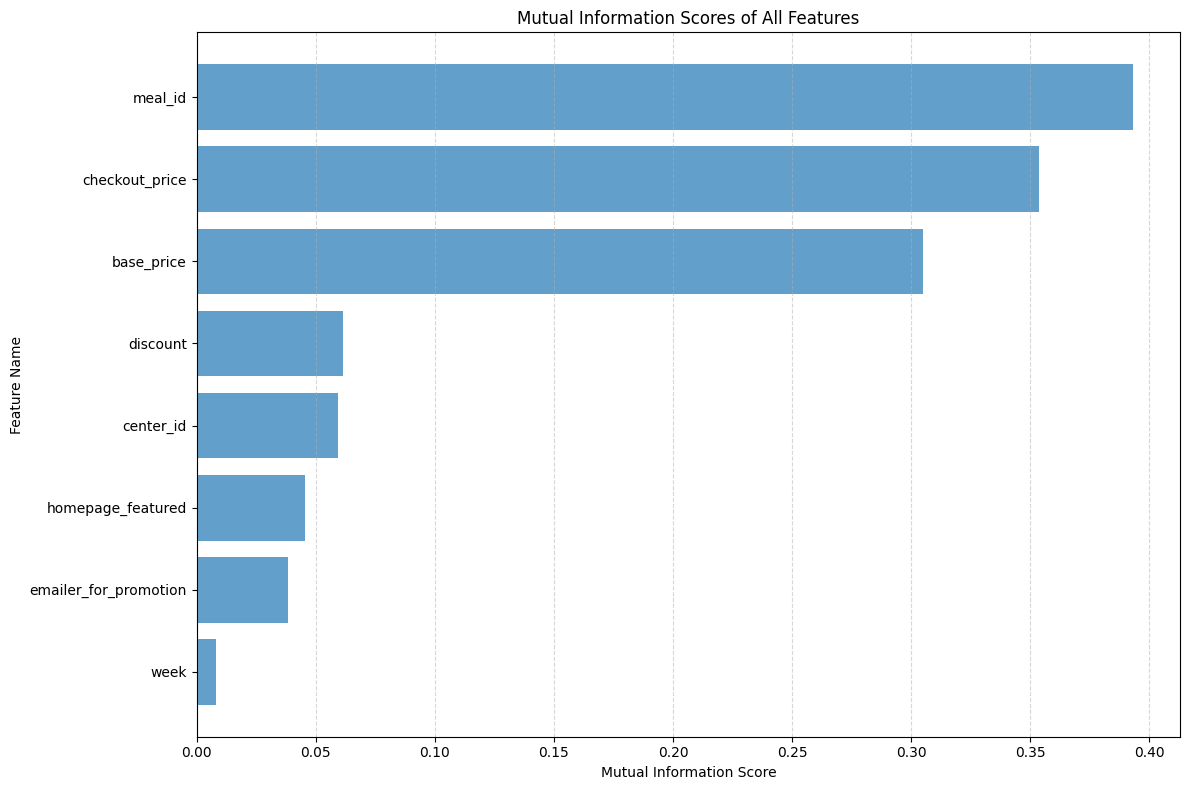

In [110]:
# now let's plot this data
import matplotlib.pyplot as plt

# Extract the feature names and their MI scores from sorted_features_ascending
feature_names, mi_scores = zip(*sorted_features_ascending)

# Create a bar plot to visualize MI scores
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_names)), mi_scores, align='center', alpha=0.7)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature Name')
plt.title('Mutual Information Scores of All Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [115]:
# first let's remove that discount column and try to build a model

In [116]:
X = X.drop(columns=['discount'])

In [113]:
# let's build a linear regression model and see how it's performing

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

# split the whole dataset into train and test, test size to be 20% of whole data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# make predictions
predictions = linear_reg_model.predict(X_test)
predictions[predictions < 0] = 0 # if a value is negative make is 0, otherwise we can't calculate the RMSLE

# calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, predictions))
print(f"RMSLE for Linear Regression: {rmsle}")


RMSLE for Linear Regression: 1.5535973873274551


In [111]:
df_test = pd.read_csv('/content/drive/MyDrive/Data Mining/food-demand-forecasting/test_QoiMO9B.csv')
df_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [121]:
test_data = df_test.drop(columns=['id'])
predictions_for_submission = linear_reg_model.predict(test_data)

In [127]:
predictions_for_submission[predictions_for_submission < 0] = 0
predictions_for_submission

array([343.36756417, 343.1929775 , 346.78149405, ..., 228.32300574,
       227.8738062 , 259.91924946])

In [128]:
submission = {"id": df_test['id'], "num_orders": predictions_for_submission}
submission_df = pd.DataFrame(submission)
submission_df

,id,num_orders
0,1028232,343.367564
1,1127204,343.192978
2,1212707,346.781494
3,1082698,344.507369
4,1400926,336.625741
...,...,...
32568,1250239,110.210309
32569,1039516,113.826115
32570,1158107,228.323006
32571,1444235,227.873806


In [129]:
submission_df.to_csv('submission.csv', index=False)

In [133]:
# round the float values to integer
predictions_for_submission_rounded = np.round(predictions_for_submission)
predictions_for_submission_rounded = predictions_for_submission_rounded.astype(int)
predictions_for_submission_rounded

array([343, 343, 347, ..., 228, 228, 260])

In [134]:
submission_new = {"id": df_test['id'], "num_orders": predictions_for_submission_rounded}
submission_new_df = pd.DataFrame(submission_new)
submission_new_df

,id,num_orders
0,1028232,343
1,1127204,343
2,1212707,347
3,1082698,345
4,1400926,337
...,...,...
32568,1250239,110
32569,1039516,114
32570,1158107,228
32571,1444235,228


In [135]:
submission_df.to_csv('submission_new.csv', index=False)

# End of Lab 03

In [112]:
df_sample_submission = pd.read_csv('/content/drive/MyDrive/Data Mining/food-demand-forecasting/sample_submission_hSlSoT6.csv')
df_sample_submission

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0
...,...,...
32568,1250239,0
32569,1039516,0
32570,1158107,0
32571,1444235,0


In [106]:
df_train.sample(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
210976,1123009,70,29,1062,175.60,176.60,0,0,324
68473,1189650,24,76,2760,242.53,242.53,0,0,122
419243,1453919,134,145,1248,96.06,139.74,1,0,175
354560,1056354,114,23,1885,150.35,144.53,0,1,730
174844,1149881,59,34,2581,641.23,639.23,0,0,189
16938,1016829,6,65,2539,114.49,113.49,0,1,527
365907,1223296,118,162,2569,282.30,282.30,0,0,499
296489,1431556,97,13,2581,680.03,678.03,0,0,285
34467,1445925,13,13,2640,281.33,280.33,0,0,366
334070,1358691,108,53,1062,162.99,161.99,0,0,311


In [82]:
weekly_sales

,week,num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197
